<a href="https://colab.research.google.com/github/MateusSampaio1/Projeto_house_sale/blob/main/Notebook/Modelo_regressaolinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Contextualização**

O dataset  utilizado contêm informações relativas ao preço das casas vendidas entre maio 2014 e maio de 2015 em King County. Este dataset foi obtido no Kaggle e pode ser encontrado neste link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

A ideia do projeto é estimar uma modelo de **regressão linear** que seja capaz de estimar o preço do imóvel dado um conjunto de características, entanto, para que isso seja possível antes será necessária realizar algumas fases para alcançar o objetivo.

A primeira parte é a de análise exploratória dos dados, onde foi observado os dados presentes no dataset, além do comportamento e distribuição de frequência da **variável dependente** (Price).

Depois disso, os dados foram transformados como forma de tratar a assimetria encontrada, visto que para atingir o objetivo precisamos que os dados se comportem como uma **distribuição normal**. Além disso, foram observadas algumas estatísticas estimadas pelo modelo de minimos quadrados ordinários(**OLS**), com a finalidade identificar os valores de **R²** e **R² ajustado**, o **teste F** e os **testes T**. 

Por fim utilizaremos o **Scikit Learn** para criar um modelo de regressão linear (**LinearRegression**) que nos permita prever o valor do imóvel com base nas características selecionadas.

In [1]:
# Importando as bibliotecas utilizadas no projeto
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Configurando o número de colunas
pd.set_option('display.max_columns',32)

In [3]:
dados = pd.read_csv('https://github.com/MateusSampaio1/Projeto_house_sale/blob/main/Dados/kc_house_data.csv')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print('O DataFrame contêm %d linhas e %d colunas'% dados.shape)

O DataFrame contêm 21613 linhas e 21 colunas


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Como é possível visualizar nos dados acima, não existem registros vazinhos em nenhuma coluna.

In [6]:
# Removendo as colunas id, date, long, lat, zipcode
dados.drop(['id', 'date', 'long', 'lat', 'zipcode'], axis = 1, inplace = True)
dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [7]:
dados.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,399.000,651.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,6210.000,871200.000


In [8]:
dados.corr().round(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.00000,0.30835,0.52514,0.70204,0.08966,0.25679,0.26637,0.39729,0.03636,0.66743,0.60557,0.32382,0.05401,0.12643,0.58538,0.08245
bedrooms,0.30835,1.00000,0.51588,0.57667,0.03170,0.17543,-0.00658,0.07953,0.02847,0.35697,0.47760,0.30309,0.15418,0.01884,0.39164,0.02924
bathrooms,0.52514,0.51588,1.00000,0.75467,0.08774,0.50065,0.06374,0.18774,-0.12498,0.66498,0.68534,0.28377,0.50602,0.05074,0.56863,0.08718
sqft_living,0.70204,0.57667,0.75467,1.00000,0.17283,0.35395,0.10382,0.28461,-0.05875,0.76270,0.87660,0.43504,0.31805,0.05536,0.75642,0.18329
sqft_lot,0.08966,0.03170,0.08774,0.17283,1.00000,-0.00520,0.02160,0.07471,-0.00896,0.11362,0.18351,0.01529,0.05308,0.00764,0.14461,0.71856
floors,0.25679,0.17543,0.50065,0.35395,-0.00520,1.00000,0.02370,0.02944,-0.26377,0.45818,0.52388,-0.24570,0.48932,0.00634,0.27989,-0.01127
waterfront,0.26637,-0.00658,0.06374,0.10382,0.02160,0.02370,1.00000,0.40186,0.01665,0.08277,0.07207,0.08059,-0.02616,0.09288,0.08646,0.03070
view,0.39729,0.07953,0.18774,0.28461,0.07471,0.02944,0.40186,1.00000,0.04599,0.25132,0.16765,0.27695,-0.05344,0.10392,0.28044,0.07257
condition,0.03636,0.02847,-0.12498,-0.05875,-0.00896,-0.26377,0.01665,0.04599,1.00000,-0.14467,-0.15821,0.17410,-0.36142,-0.06062,-0.09282,-0.00341
grade,0.66743,0.35697,0.66498,0.76270,0.11362,0.45818,0.08277,0.25132,-0.14467,1.00000,0.75592,0.16839,0.44696,0.01441,0.71320,0.11925


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


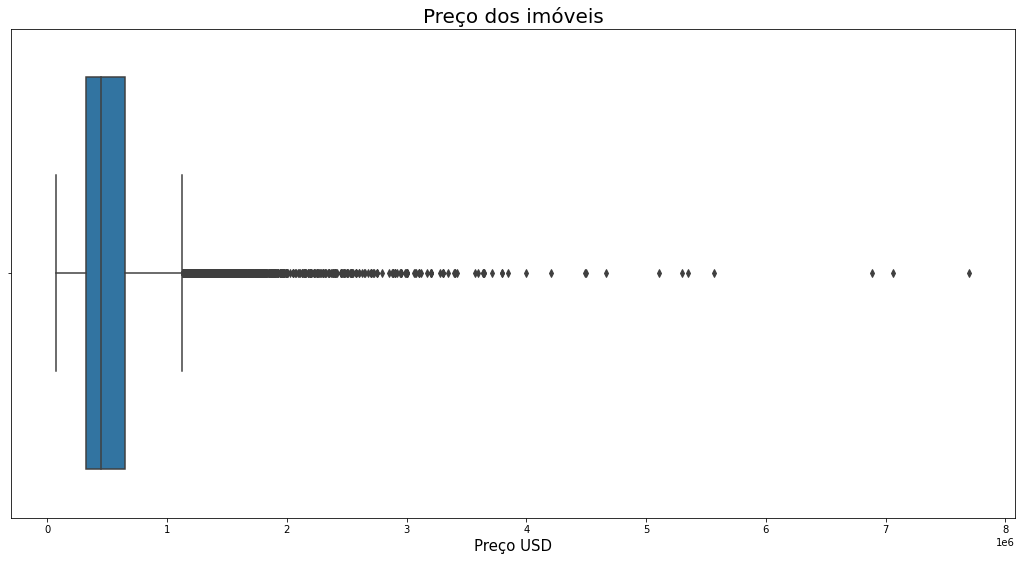

In [9]:
# Plotando o boxplot para identificar o comportamento da variável dependente.
ax = sns.boxplot(dados['price'], orient = 'h')
ax.figure.set_size_inches(18,9)
ax.set_title('Preço dos imóveis', fontsize = 20)
ax.set_xlabel('Preço USD', fontsize = 15)
ax = ax

É claramente evidente que existe uma assimetria a direita, algo que é comum neste tipo de dado

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


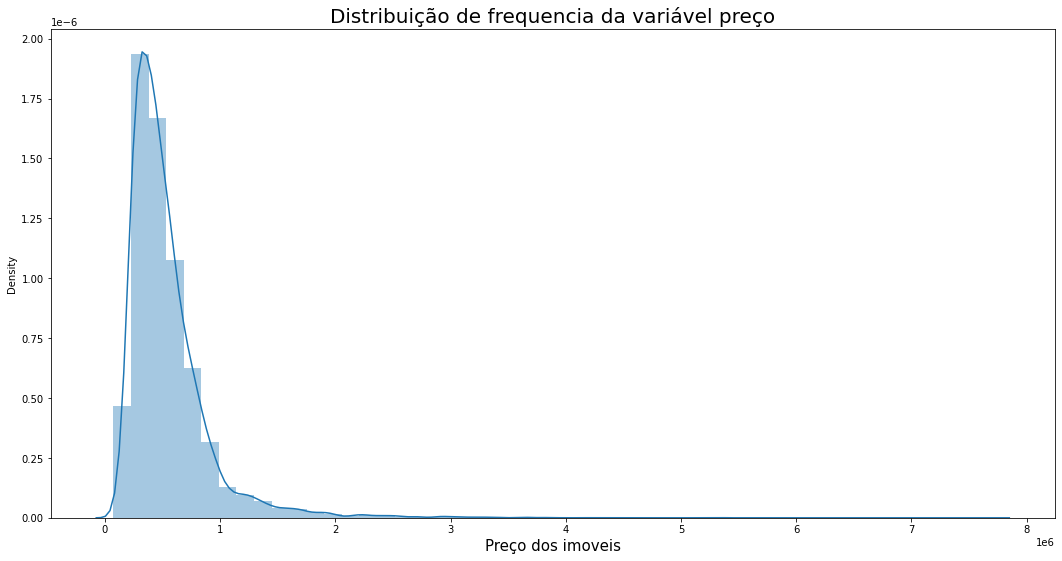

In [10]:
# Plotando o gráfico de distribuição de frequência para a variável dependente.
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(18,9)
ax.set_title('Distribuição de frequencia da variável preço', fontsize = 20)
ax.set_xlabel('Preço dos imoveis', fontsize = 15)
ax = ax

In [11]:
dados.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

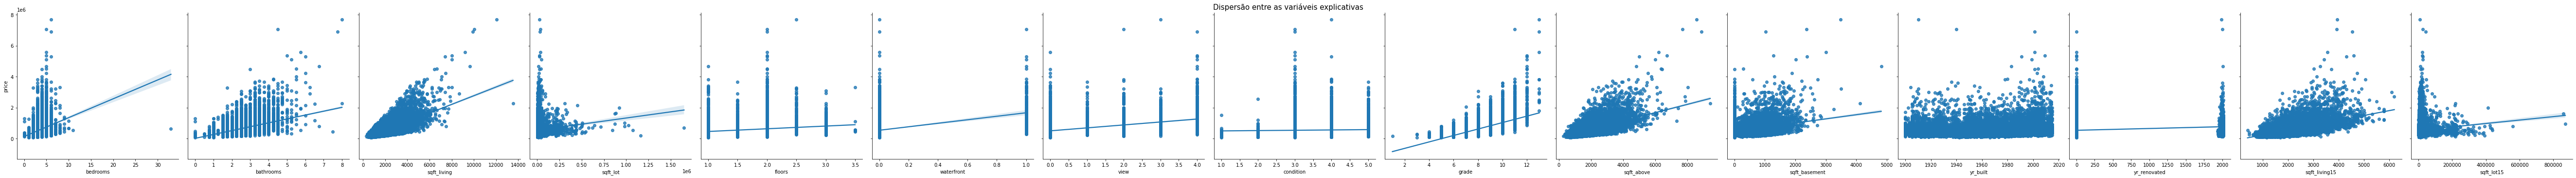

In [12]:
# Visualizando a dispersão entre as variáveis explicativas
ax = sns.pairplot(data = dados, y_vars= 'price', x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                                                           'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                                                           'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
                                                           'sqft_lot15'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as variáveis explicativas', fontsize = 15, y = 1)
ax

In [13]:
# Transformando as variáveis do dt
dados['log_price'] = np.log(dados['price'])
dados['log_bedrooms'] = np.log(dados['bedrooms']+1)
dados['log_bathrooms'] = np.log(dados['bathrooms']+1)
dados['log_sqft_living'] = np.log(dados['sqft_living'])
dados['log_sqft_lot'] = np.log(dados['sqft_lot'])
dados['log_floors'] = np.log(dados['floors'])
dados['log_waterfront'] = np.log(dados['waterfront']+1)
dados['log_view'] = np.log(dados['view']+1)
dados['log_condition'] = np.log(dados['condition'])
dados['log_grade'] = np.log(dados['grade'])
dados['log_sqft_above'] = np.log(dados['sqft_above'])
dados['log_sqft_basement'] = np.log(dados['sqft_basement']+1)
dados['log_yr_built'] = np.log(dados['yr_built'])
dados['log_yr_renovated'] = np.log(dados['yr_renovated']+1)
dados['log_sqft_living15'] = np.log(dados['sqft_living15'])
dados['log_sqft_lot15'] = np.log(dados['sqft_lot15'])

> Como algumas variáveis possuem valores mínimos iguais a 0 foi necessário somar +1 a estas variáveis para evitar que seja realizado o log(0) que não existe ou é indefinido.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


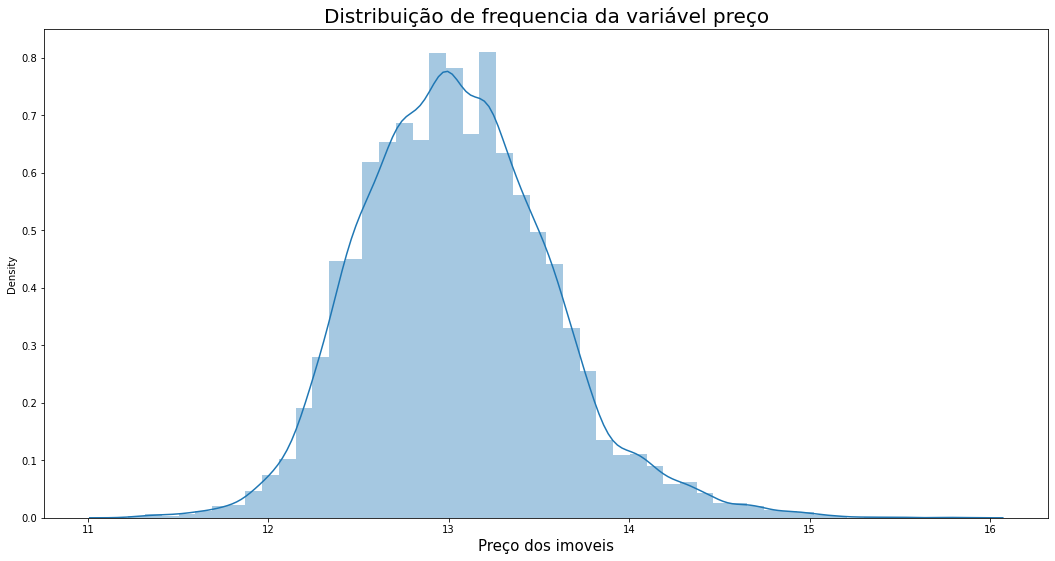

In [14]:
#Plotando novamente o gráfico de dispersão para observar a mudança de comportamento após a aplicação do Log
ax = sns.distplot(dados['log_price'])
ax.figure.set_size_inches(18,9)
ax.set_title('Distribuição de frequencia da variável preço', fontsize = 20)
ax.set_xlabel('Preço dos imoveis', fontsize = 15)
ax = ax

Como pode-se observar, a variável apresentou uma melhora relevante e agora tem uma distribuição mais parecida com uma normal.

In [15]:
# Observando o dataset com a adição das variáveis transformadas.
dados.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_floors,log_waterfront,log_view,log_condition,log_grade,log_sqft_above,log_sqft_basement,log_yr_built,log_yr_renovated,log_sqft_living15,log_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,12.309982,1.386294,0.693147,7.073270,8.639411,0.000000,0.0,0.0,1.098612,1.945910,7.073270,0.000000,7.578145,0.000000,7.200425,8.639411
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,13.195614,1.386294,1.178655,7.851661,8.887653,0.693147,0.0,0.0,1.098612,1.945910,7.682482,5.993961,7.576097,7.596894,7.432484,8.941022
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,12.100712,1.098612,0.693147,6.646391,9.210340,0.000000,0.0,0.0,1.098612,1.791759,6.646391,0.000000,7.566828,0.000000,7.908387,8.994917
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,13.311329,1.609438,1.386294,7.580700,8.517193,0.000000,0.0,0.0,1.609438,1.945910,6.956545,6.814543,7.583248,0.000000,7.215240,8.517193
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,13.142166,1.386294,1.098612,7.426549,8.997147,0.000000,0.0,0.0,1.098612,2.079442,7.426549,0.000000,7.594381,0.000000,7.495542,8.923058


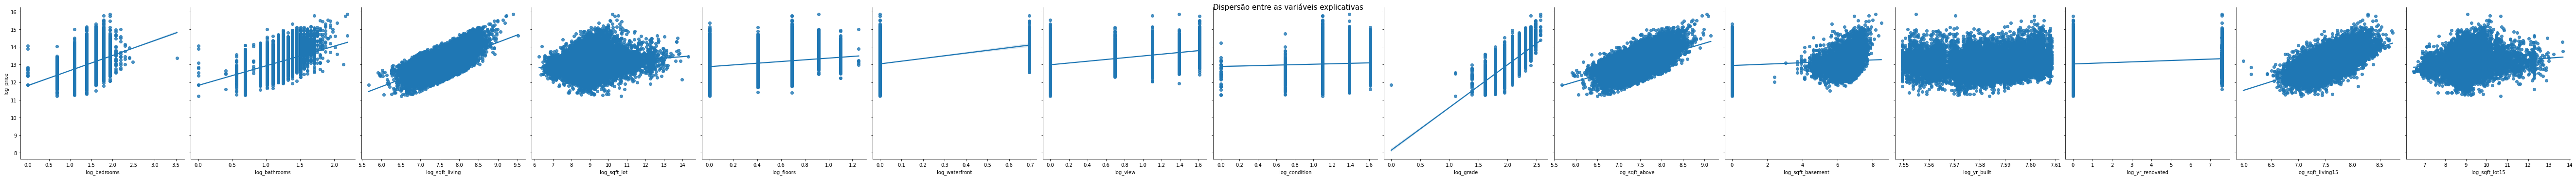

In [16]:
# Visualizando a dispersão entre as variáveis explicativas após a transformação.
ax = sns.pairplot(data = dados, y_vars= 'log_price', x_vars = ['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_sqft_lot', 'log_floors',
                                                               'log_waterfront', 'log_view', 'log_condition', 'log_grade', 'log_sqft_above',
                                                               'log_sqft_basement', 'log_yr_built', 'log_yr_renovated', 'log_sqft_living15',
                                                               'log_sqft_lot15'], kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as variáveis explicativas', fontsize = 15, y = 1)
ax


In [17]:
# Definindo os dados de X e y
y = dados['log_price']
x = dados[['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_sqft_lot', 'log_floors',
           'log_waterfront', 'log_view', 'log_condition', 'log_grade', 'log_sqft_above',
           'log_sqft_basement', 'log_yr_built', 'log_yr_renovated', 'log_sqft_living15',
           'log_sqft_lot15']]

In [18]:
# Definindo uma SEED para garantir a replicabilidade do modelo.
SEED = 7
np.random.seed(SEED)

# Separando os dados entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = SEED)

In [19]:
# Adicionando a constante que será necessário para o modelo OLS
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
#Treinando o modelo OLS do statsmodels
modelo_stats = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()

# Observando os resultado obtidos por meio do método de OLS
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1955.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:26:20   Log-Likelihood:                -3680.0
No. Observations:               15129   AIC:                             7392.
Df Residuals:                   15113   BIC:                             7514.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                87.9880      1.80

Considerando um intervalo de confiança de 95% a variável log_sqft_lot não é sigficante estatísticamente para explicar a variável preço e por isso, ela será removida.

In [21]:
# Removendo a coluna log_sqft_lot.
dados.drop('log_sqft_lot', axis = 1, inplace = True)

In [22]:
# Separando novamente as variáveis explicativas e a dependente, considerando a remoção da variável acima.
y = dados['log_price']
x = dados[['log_bedrooms', 'log_bathrooms', 'log_sqft_living', 'log_floors',
           'log_waterfront', 'log_view', 'log_condition', 'log_grade', 'log_sqft_above',
           'log_sqft_basement', 'log_yr_built', 'log_yr_renovated', 'log_sqft_living15',
           'log_sqft_lot15']]

In [23]:
# Definindo uma SEED para garantir a replicabilidade do modelo.
SEED = 7
np.random.seed(SEED)

# Separando novamente entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = SEED)

In [24]:
# Criando um X_train que contenha a constante para utilização do OLS.
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
# Treinamendo novamente o modelo e mostrando os resultados
modelo_stats = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2095.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:26:20   Log-Likelihood:                -3680.4
No. Observations:               15129   AIC:                             7391.
Df Residuals:                   15114   BIC:                             7505.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                87.8808      1.80

Os valores encotrados no R2 e no R2 ajustado se mantiveram os mesmo, o que reforça ainda mais a ideia de que a variável removida não possuia nenhuma contribuição explicativa para o modelo.
 

In [26]:
# Instanciando o modelo de regressão, treinando o mesmo e mostrando o score encontrado
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print('R² = %s'%modelo.score(X_train, y_train).round(3))

R² = 0.66


In [27]:
# Realizando a predição com o modelo treinndo anteriormente e calculando um R²_score baseado no y_previsto e no y_esperado
y_pred = modelo.predict(X_test)
print('R² = %s'%metrics.r2_score(y_test, y_pred).round(3))

R² = 0.648


# Criando um simulador

Para facilitar a utilização do simulador, irei considerar apenas algumas variáveis para treinar um novo modelo preditivo que irá estimar um valor para o imóvel que se enquadrar nas caracteristicas
Neste novo modelo irei considerar apenas as variáveis **Bedrooms**, **Bathrooms**, **Waterfront**, **Floors**, **Condition** e **View**.
> **Bedrooms** - 0 até 11

> **Bathrooms** - 0 até 8

>**Waterfront** - 0 ou 1 

> **Floors** - 1 até 3

> **Condition** - 1 até 5

> **View** - 0 até 4


In [28]:
# Instanciando as variáveis X e y que serão utilizadas neste modelo
y = dados['log_price']
X = dados[['log_bedrooms', 'log_bathrooms', 'log_waterfront', 'log_floors','log_condition','log_view']]

In [29]:
# Definindo a SEED para garantir a replicabilidade
SEED = 7
np.random.seed(SEED)

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = SEED)

# Instanciando o modelo
modelo_lin= LinearRegression() 

#Treinando o modelo instaciado
modelo_lin.fit(X_train, y_train)
print('R² = %s' %modelo_lin.score(X_train, y_train).round(3))


R² = 0.38


In [30]:
#Definindo uma variável como o y previsto e comparando com o y_test
y_pred = modelo_lin.predict(X_test)
print('R² = %s'% metrics.r2_score(y_test, y_pred).round(3))

R² = 0.366


In [31]:
# Função de simulação
def simulador(bedrooms, bathrooms,view, waterfront, condition, floors):
    entrada=[[np.log(bedrooms + 1), np.log(bathrooms + 1), np.log(view + 1), np.log(waterfront + 1), np.log(condition),np.log(floors)]]
            
    print('$ {0:.2f}'.format(np.exp(modelo_lin.predict(entrada)[0])))
 

In [32]:
simulador(3,2,4,1,4,2)

$ 1593117.85


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
